## 653380120-2 sec.1 กัมแพงเพชร สิงห์ขรณ์

#RBF from scratch

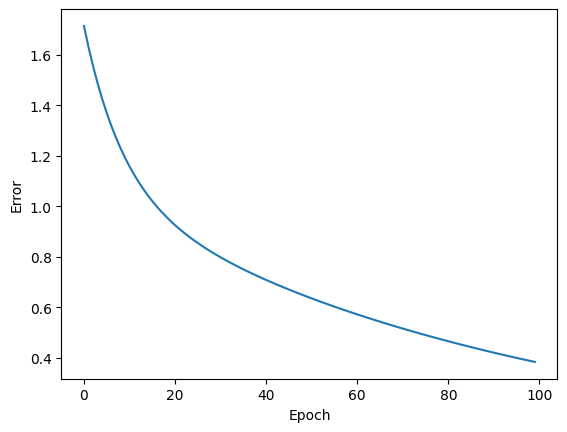

In [ ]:
#LMS
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import DistanceMetric
import matplotlib.pyplot as plt

X = np.array([
    [0.1, 0.9],
    [0.2, 0.8],
    [0.3, 0.7],
    [0.9, 0.1],
    [0.9, -0.1]])
y = np.array([-1,
              -1,
              -1,
              1,
              1])


#[2-2-1]
def gaussian_rbf(x,c,sigma):
  return np.exp(-np.linalg.norm(x - c, axis=1)**2 / (2*sigma**2))

hiddenNode = 2
sigma = 1
epoch = 100
eta = 0.01

#center
kmean = KMeans(n_clusters=4, random_state=0, n_init=10)
kmean.fit(X)
centers = kmean.cluster_centers_

#output weight
output_weight = np.random.uniform(0,1,(hiddenNode,))

#training
errors = []
for _ in range(epoch):
  #hidden layer
  H = np.zeros((X.shape[0],hiddenNode))
  for i in range(hiddenNode):
    H[:,i] = gaussian_rbf(X,centers[i],sigma)

  #output layer
  Y_hat = H.dot(output_weight)
  e = y - Y_hat
  output_weight += (eta*e).dot(H)

  #error over each epoch
  Y_hat = H.dot(output_weight)
  errors.append(np.mean(np.square(y - (H.dot(output_weight)))))

#plot
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


#Random Net from scratch

In [ ]:
import numpy as np

X = np.array([
    [0.1, 0.9],
    [0.2, 0.8],
    [0.3, 0.7],
    [0.9, 0.1],
    [0.9, -0.1]])
y = np.array([-1,-1,-1, 1, 1])

def sigmoid(x):
  return 1 / ( 1 + np.exp(-x) )

hiddenNode = 2
input_weight = np.random.uniform(0,1,(X.shape[1]+1, hiddenNode))

#train random net
#hidden layer
x = np.hstack((np.ones((X.shape[0],1)) , X))
H = sigmoid(x.dot(input_weight))

#compute output weight
H = np.hstack((np.ones((H.shape[0],1)),H))
output_weight = np.linalg.inv(np.dot(H.T, H)) @H.T @y
Y_hat = H @ output_weight

print("Y_hat : ",Y_hat,"\n  Y : ",y)

Y_hat :  [-1.26536559 -0.9607176  -0.66687586  0.83374238  1.05921667] 
  Y :  [-1 -1 -1  1  1]


#Tasks

1.   สร้าง model RBF และ Random NN สำหรับ Iris data
2.   สร้าง model RBF และ Random NN สำหรับ Spiral data



## iris data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import DistanceMetric

iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler().fit(X_train)
encoder = LabelBinarizer().fit(y_train)

#data for training phase
X_train = scaler.transform(X_train)
y_train = encoder.transform(y_train)

#data for testing phase
X_test = scaler.transform(X_test)
y_test = encoder.transform(y_test)

###RBF for Iris Data

In [ ]:
#CODE
class RBF:
  def __init__(self, inputNode, outputNode):
    self.x = inputNode
    self.y = outputNode
    self.hiddenNode = 4
    self.sigma = 1

  def gaussian_rbf(self, x, center, sigma):
    return np.exp(- (np.linalg.norm(x - center, axis=1)**2) / (2 * sigma**2))

  def center(self, x):
    kmean = KMeans(n_clusters=self.hiddenNode, random_state=0, n_init=10)
    kmean.fit(x)
    centers = kmean.cluster_centers_
    return centers

  def compute_hidden(self, x, centers):
    self.h = np.zeros((x.shape[0], self.hiddenNode))
    for i in range(self.hiddenNode):
      self.h[:,i] = self.gaussian_rbf(x, centers[i], self.sigma)
    return self.h

  def train(self, x, y):
    centers = self.center(x)
    self.H = self.compute_hidden(x, centers)
    self.Beta = np.linalg.inv(self.H.T @ self.H) @ self.H.T @ y

  def output_layer(self):
    self.Y_hat = self.H @ self.Beta
    return self.Y_hat

  def predict(self, x):
    centers = self.center(x)
    self.H = self.compute_hidden(x, centers)
    return self.output_layer()


In [ ]:
inputNode = X_train.shape[1]
outputNode = y_train.shape[1]

#Create RBF model
rbf = RBF(inputNode, outputNode)

#Train model
rbf.train(X_train,y_train)

#Predict
y_predicted = rbf.predict(X_train)


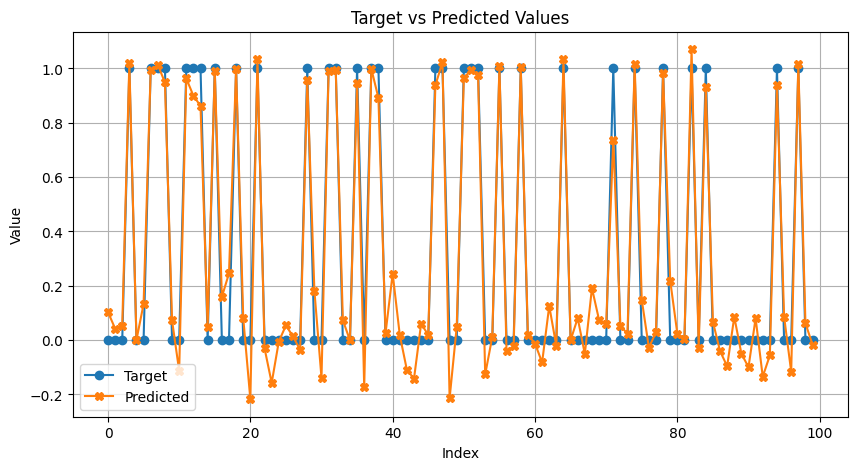

In [ ]:
# กราฟแสดงความคลาดเคลื่อนของค่า y1 เที่ยบกับค่า y_hat1 ที่ได้จากโมเดล RBF ใช้ข้อมูล Iris Dataset
plt.figure(figsize=(10, 5))
plt.plot(y_train[:,0], label='Target', marker='o')
plt.plot(y_predicted[:,0], label='Predicted', marker='X')

plt.title('Target vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

###Random NN for Iris Data

In [ ]:
#CODE
class RandomNN:
  def __init__(self, inputNode):
    self.x = inputNode
    self.hiddenNode = 4
    self.input_weight = np.random.uniform(0,1,(self.x + 1, self.hiddenNode))

  def sigmoid(self, x):
    return 1 / ( 1 + np.exp(-x) )

  def compute_hidden(self, x):
    x = np.hstack((np.ones((x.shape[0], 1)) , x))
    h = self.sigmoid(x.dot(self.input_weight))
    return h

  def train(self, x, y):
    self.H = self.compute_hidden(x)
    self.H = np.hstack((np.ones((self.H.shape[0], 1)), self.H))
    self.beta = np.linalg.inv(self.H.T @ self.H) @ self.H.T @ y

  def output_layer(self):
    self.Y_hat = self.H @ self.beta
    return self.Y_hat

  def predict(self, x):
    self.H = self.compute_hidden(x)
    self.H = np.hstack((np.ones((self.H.shape[0], 1)), self.H))
    return self.output_layer()


In [ ]:
inputNode = X_train.shape[1]

#Create RBF model
ranNN = RandomNN(inputNode)

#Train model
ranNN.train(X_train,y_train)

#Predict
y_predicted = ranNN.predict(X_train)


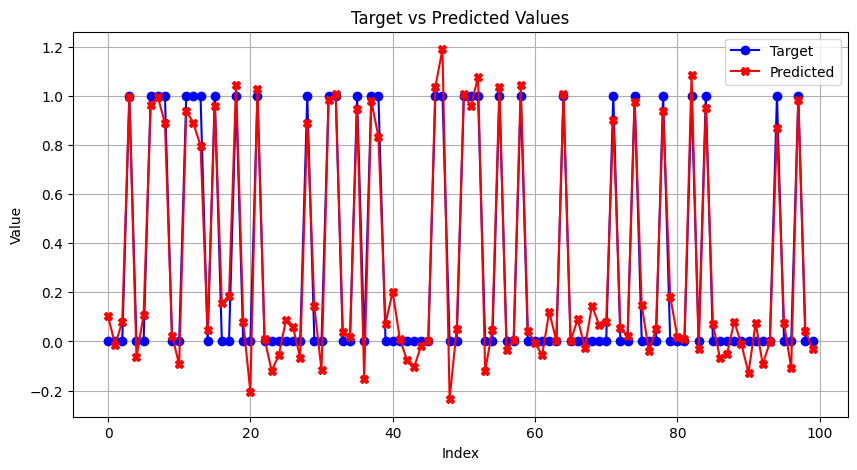

In [ ]:
# กราฟแสดงความคลาดเคลื่อนของค่า y1 เที่ยบกับค่า y_hat1 ที่ได้จากโมเดล Random NN ใช้ข้อมูล Iris Dataset
plt.figure(figsize=(10, 5))
plt.plot(y_train[:,0], label='Target', marker='o',color='blue')
plt.plot(y_predicted[:,0], label='Predicted', marker='X',color='red')

plt.title('Target vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

##spiral data

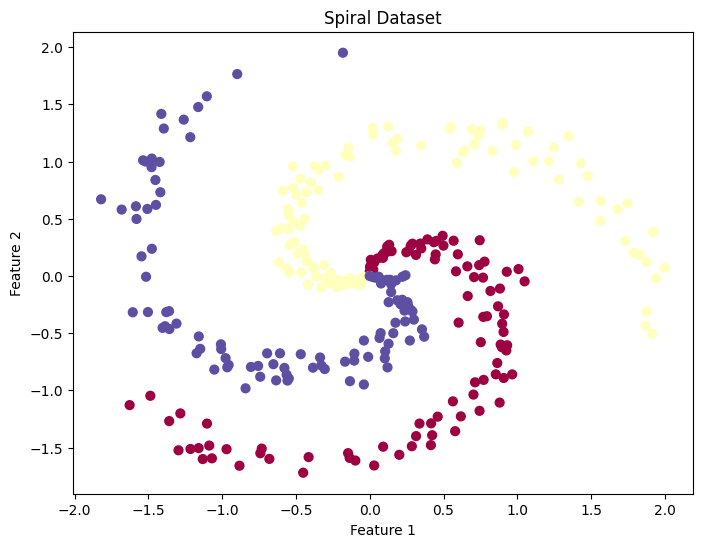

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def create_spiral_data(points, classes):
    X = np.zeros((points*classes, 2))  # Data matrix (each row = single example)
    y = np.zeros(points*classes, dtype='uint8')  # Class labels

    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 2, points)  # Radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2  # Theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = class_number

    return X, y

# Parameters
points_per_class = 100
number_of_classes = 3

# Generate dataset
X, y = create_spiral_data(points_per_class, number_of_classes)

# Plot dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Spiral Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#OneHotEncoding
encoding = OneHotEncoder()
encoding.fit(y.reshape(-1,1))
Y_train = encoding.transform(y.reshape(-1,1)).toarray()

In [ ]:
print(X.shape," | ",Y_train.shape)

(300, 2)  |  (300, 3)


### RBF for Spiral data

In [ ]:
#CODE
inputNode = X.shape[1]
outputNode = Y_train.shape[1]

#Create RBF model for Spiral Dataset
rbfSpiral = RBF(inputNode, outputNode)

#Train model
rbfSpiral.train(X,Y_train)

#Predict
y_predicted = rbfSpiral.predict(X)

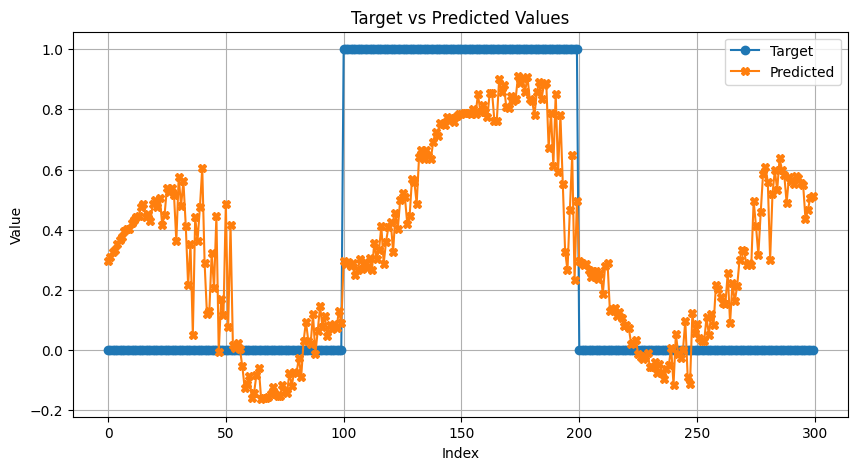

In [ ]:
# กราฟแสดงความคลาดเคลื่อนของค่า y2 เที่ยบกับค่า y_hat2 ที่ได้จากโมเดล RBF โดยใช้ข้อมูล Spiral Dataset
plt.figure(figsize=(10, 5))
plt.plot(Y_train[:,1], label='Target', marker='o')
plt.plot(y_predicted[:,1], label='Predicted', marker='X')

plt.title('Target vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

### Random NN for Spiral data

In [ ]:
#CODE
#Create Model
ranNNSpiral = RandomNN(inputNode)

#Train Model
ranNNSpiral.train(X,Y_train)

#Predict y
y_predicted = ranNNSpiral.predict(X)

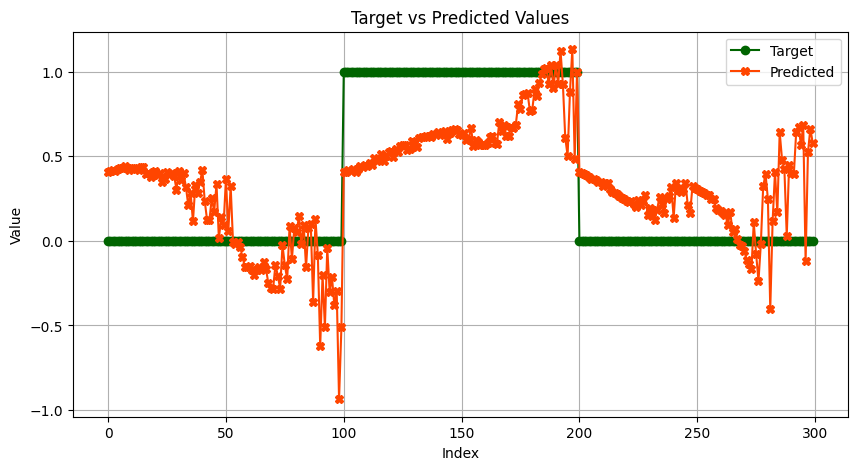

In [ ]:
# กราฟแสดงความคลาดเคลื่อนของค่า y2 เที่ยบกับค่า y_hat2 ที่ได้จากโมเดล Random NN ใช้ข้อมูล Spiral Dataset
plt.figure(figsize=(10, 5))
plt.plot(Y_train[:,1], label='Target', marker='o',color='#006400')
plt.plot(y_predicted[:,1], label='Predicted', marker='X',color='#FF4500')

plt.title('Target vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()